# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 


---
## Import libraries

In [1]:
!ls -l

total 5380
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 20 20:02 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  210001 Jan 15 18:51 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  254485 Jan 20 19:51 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  253300 Jan 20 20:00 7_6_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  255888 Jan 20 22:14 7_7_resnext50_more_epoch_update_sz

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
#!ls -l {PATH}

In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=128
bs=32
lr = 0.0075

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.0), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.55)

### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 61%|██████    | 25/41 [00:00<00:00, 26.40it/s, loss=13]   


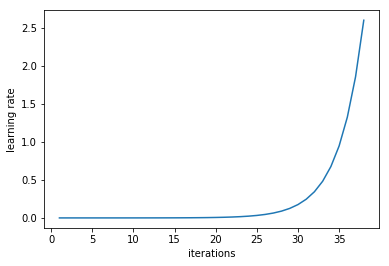

In [12]:
learn.sched.plot_lr()

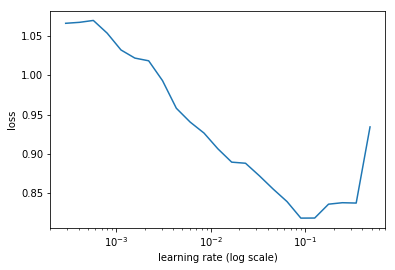

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 9)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[0.      0.58914 0.38332 0.82954]                          
[1.      0.49857 0.35798 0.84091]                          
[2.      0.49615 0.37098 0.82954]                          
[3.      0.45108 0.38589 0.83523]                          
[4.      0.42321 0.36436 0.83239]                          
[5.      0.40413 0.34622 0.86079]                          
[6.      0.39234 0.3788  0.83807]                          
[7.      0.34126 0.36086 0.82386]                          
[8.      0.32163 0.40159 0.80966]                          



## Stochastic Gradient Descent with Restart

In [15]:
lr = 0.0075

In [16]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.49519 0.34976 0.83807]                          
[1.      0.52507 0.4109  0.73579]                          
[2.      0.50282 0.38799 0.83807]                          
[3.      0.50093 0.39744 0.82102]                          
[4.      0.49359 0.35228 0.85511]                          
[5.      0.45569 0.34807 0.86648]                          
[6.      0.44707 0.33876 0.84943]                          
[7.      0.44135 0.37259 0.83523]                          
[8.      0.46557 0.35429 0.84375]                          
[9.      0.46279 0.36772 0.84659]                          
[10.       0.4748   0.34667  0.83807]                      
[11.       0.45682  0.35541  0.84659]                      
[12.       0.43367  0.35683  0.84943]                      
[13.       0.43849  0.35987  0.83807]                      
[14.       0.42141  0.35925  0.82954]                      
[15.       0.43512  0.35571  0.83239]                      
[16.       0.43175  0.35148  0.83239]   

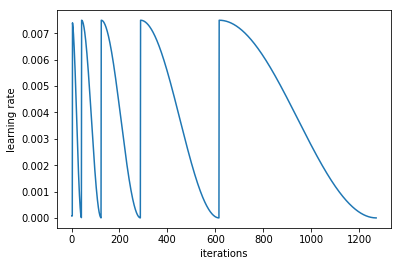

In [17]:
learn.sched.plot_lr()

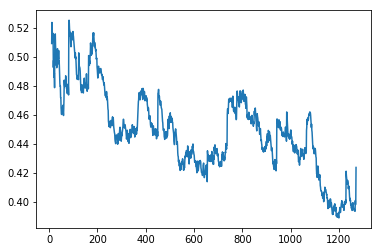

In [18]:
learn.sched.plot_loss()

In [19]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.333332394520013, 0.8411214953271028)

In [20]:
# lr/10

In [21]:
# lr/9

In [22]:
# lr/3

In [23]:
# lr/4

# Unfreeze Layers

In [24]:
# unfreeze layers

learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
#lrs = np.array([lr/9,lr/3,lr/1])

lrs = np.array([lr/11,lr/5,lr/2])


### Run Learner Again

In [25]:
learn.fit(lrs, 6, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

[0.      0.5125  0.35994 0.85227]                          
[1.      0.4873  0.29016 0.86364]                          
[2.      0.40126 0.31746 0.88352]                          
[3.      0.34912 0.27811 0.86932]                          
[4.      0.34752 0.25278 0.88636]                          
[5.      0.31504 0.28099 0.86932]                          
[6.      0.27475 0.2769  0.86648]                          
[7.      0.2791  0.26938 0.88921]                          
[8.      0.30772 0.26277 0.86932]                          
[9.      0.31938 0.2383  0.89773]                          
[10.       0.32929  0.25089  0.88636]                      
[11.       0.32302  0.26279  0.88636]                      
[12.       0.28451  0.27441  0.87784]                      
[13.       0.25382  0.23607  0.89773]                      
[14.       0.24284  0.263    0.88921]                      
[15.       0.26591  0.34303  0.84091]                      
[16.       0.31529  0.33585  0.85511]   

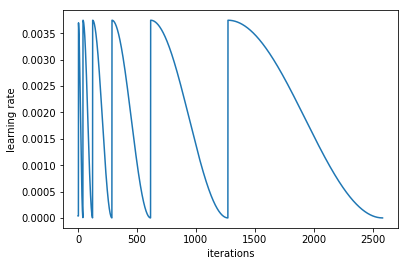

In [26]:
learn.sched.plot_lr()

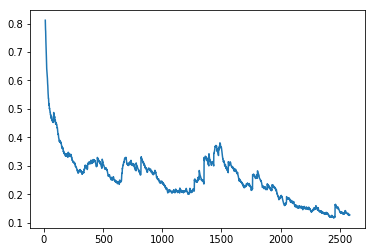

In [27]:
learn.sched.plot_loss()

### Log Loss | Accuracy

In [28]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.22724770442431763, 0.897196261682243)

In [29]:
learn.save('resnext50_sz75_zm15_sequ_4')
learn.load('resnext50_sz75_zm15_sequ_4')

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.15277 0.2538  0.90909]                          
[1.      0.22474 0.31864 0.875  ]                          
[2.      0.16597 0.24882 0.90625]                          
[3.      0.1705  0.29324 0.89489]                          
[4.      0.15465 0.29524 0.87216]                          
[5.      0.15689 0.2943  0.89204]                          
[6.      0.14741 0.2499  0.90909]                          
[7.      0.14434 0.26739 0.89489]                          
[8.      0.1664  0.27573 0.88352]                          
[9.      0.17475 0.21598 0.91477]                          
[10.       0.1468   0.2635   0.89773]                      
[11.       0.12381  0.2555   0.90341]                      
[12.       0.12278  0.25627  0.91477]                      
[13.       0.15629  0.28315  0.90341]                      
[14.       0.11612  0.25585  0.91193]                      
[15.       0.10963  0.28706  0.88636]                      
[16.       0.09801  0.39648  0.86932]   

(0.2085947903473867, 0.9065420560747663)

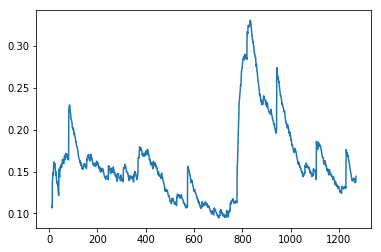

In [30]:
### Run Learner again

learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

learn.sched.plot_loss()

log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

In [31]:
learn.save('resnext50_sz75_zm15_sequ_5')
learn.load('resnext50_sz75_zm15_sequ_5')

In [34]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_zm15_sequ_5.csv')

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.12886 0.26851 0.90909]                          
[1.      0.13513 0.26437 0.89773]                          
[2.      0.17852 0.30053 0.89204]                          
[3.      0.17632 0.32158 0.88636]                          
[4.      0.18563 0.30407 0.87784]                          
[5.      0.14389 0.28103 0.89773]                          
[6.      0.14204 0.3219  0.87784]                          
[7.      0.23589 0.22447 0.90909]                          
[8.      0.25183 0.21184 0.91193]                          
[9.      0.20777 0.22018 0.90909]                          
[10.       0.18591  0.2622   0.90625]                      
[11.       0.14641  0.25867  0.90909]                      
[12.       0.14831  0.25211  0.92046]                      
[13.       0.1443   0.25274  0.91193]                      
[14.       0.11526  0.23744  0.91193]                      
[15.       0.12268  0.26277  0.91477]                      
[16.       0.12457  0.3015   0.91193]   

(0.22784101516728522, 0.9190031152647975)

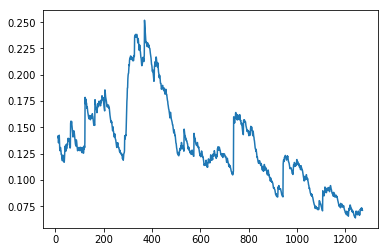

In [32]:
### Run Learner again

learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

learn.sched.plot_loss()

log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

In [33]:
learn.save('resnext50_sz75_zm15_sequ_6')
learn.load('resnext50_sz75_zm15_sequ_6')
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_zm15_sequ_4.csv')

## Resize the images

In [ ]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

## Image Size of 140

In [ ]:
#train for image size
learn.set_data(get_data(140, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)



In [ ]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

In [ ]:
learn.save('resnext50_sz75_zm15_sequ_4')
learn.load('resnext50_sz75_zm15_sequ_4')

In [ ]:
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_zm15_sequ_4.csv')

---
## Image Size of 150

In [ ]:
#train for image size 
learn.set_data(get_data(150, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

---
## Save learner

In [ ]:
learn.save('resnext50_sz75_sequ_5')

In [ ]:
learn.load('resnext50_sz75_sequ_5')

## Output predictions to csv file

In [ ]:
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_sequ_5.csv')

# END FILE

### Run Learner again

In [ ]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [ ]:
learn.sched.plot_loss()

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

### Run Learner again

In [ ]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [ ]:
learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

## Save predictions

In [ ]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )